<center><h1><strong>DATA ANALySIS</strong></h1></center>


* __authors__ = [@g30v4](https://github.com/g30v4)
* __date__ = "14/12/2022"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Interpretacion, comprension  y modelamiento de la data" 
* __keywords__ = "Machine Learning, K-Means, World Cup, Soccer, Data Analysis"

# 1. Pre Requisitos

In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

# 2. Carga de la Data

In [2]:
# Ubicacion del archivo de datos
url = 'statsWorldCup.csv' # external url?

In [3]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional) 
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,Pos.,Selección,TJ,Pts.,PJ,PG,PE,PP,GF,GC,Dif.,Títulos,Rend.
0,0,1,Brasil Brasil,22,246,113,76,18,19,236,107,129,5,"72,32%"
1,1,2,Alemania Alemania[n 1],20,225,112,68,21,23,232,130,102,4,"66,96%"
2,2,3,Italia Italia,18,156,83,45,21,17,128,77,51,4,"62,65%"
3,3,4,Argentina Argentina,18,153,85,46,15,24,144,96,48,2,60%
4,4,5,Francia Francia,16,124,70,37,13,20,129,81,48,2,"58,45%"


# 3. Inspeccion de la data

In [4]:

# Visualizamos el DataFrame
data

,Unnamed: 0,Pos.,Selección,TJ,Pts.,PJ,PG,PE,PP,GF,GC,Dif.,Títulos,Rend.
0,0,1,Brasil Brasil,22,246,113,76,18,19,236,107,129,5,"72,32%"
1,1,2,Alemania Alemania[n 1],20,225,112,68,21,23,232,130,102,4,"66,96%"
2,2,3,Italia Italia,18,156,83,45,21,17,128,77,51,4,"62,65%"
3,3,4,Argentina Argentina,18,153,85,46,15,24,144,96,48,2,60%
4,4,5,Francia Francia,16,124,70,37,13,20,129,81,48,2,"58,45%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,76,China China,1,0,3,0,0,3,0,9,-9,-,0%
76,76,77,Canadá Canadá,2,0,6,0,0,6,2,12,-10,-,0%
77,77,78,Haití Haití,1,0,3,0,0,3,2,14,-12,-,0%
78,78,79,República Democrática del Congo R. D. del Cong...,1,0,3,0,0,3,0,14,-14,-,0%


In [5]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,Pos.,Selección,TJ,Pts.,PJ,PG,PE,PP,GF,GC,Dif.,Títulos,Rend.
0,1,Brasil Brasil,22,246,113,76,18,19,236,107,129,5,"72,32%"
1,2,Alemania Alemania[n 1],20,225,112,68,21,23,232,130,102,4,"66,96%"
2,3,Italia Italia,18,156,83,45,21,17,128,77,51,4,"62,65%"
3,4,Argentina Argentina,18,153,85,46,15,24,144,96,48,2,60%
4,5,Francia Francia,16,124,70,37,13,20,129,81,48,2,"58,45%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,China China,1,0,3,0,0,3,0,9,-9,-,0%
76,77,Canadá Canadá,2,0,6,0,0,6,2,12,-10,-,0%
77,78,Haití Haití,1,0,3,0,0,3,2,14,-12,-,0%
78,79,República Democrática del Congo R. D. del Cong...,1,0,3,0,0,3,0,14,-14,-,0%


In [6]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pos.       80 non-null     int64 
 1   Selección  80 non-null     object
 2   TJ         80 non-null     int64 
 3   Pts.       80 non-null     int64 
 4   PJ         80 non-null     int64 
 5   PG         80 non-null     int64 
 6   PE         80 non-null     int64 
 7   PP         80 non-null     int64 
 8   GF         80 non-null     int64 
 9   GC         80 non-null     int64 
 10  Dif.       80 non-null     int64 
 11  Títulos    80 non-null     object
 12  Rend.      80 non-null     object
dtypes: int64(10), object(3)
memory usage: 8.2+ KB


In [7]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,Pos.,TJ,Pts.,PJ,PG,PE,PP,GF,GC,Dif.
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,6.112500,33.212500,23.900000,9.312500,5.275000,9.312500,33.700000,33.700000,0.000000
std,23.2379,5.372206,48.284152,25.097077,14.511099,5.458648,6.951175,47.123162,28.691021,25.656938
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,-39.000000
25%,20.7500,1.750000,3.000000,6.000000,0.750000,1.000000,3.000000,4.000000,11.000000,-10.250000
50%,40.5000,4.500000,16.000000,16.500000,4.000000,3.000000,7.500000,15.000000,23.000000,-5.000000
75%,60.2500,9.000000,40.250000,33.000000,12.000000,8.000000,14.250000,40.750000,49.250000,0.000000
max,80.0000,22.000000,246.000000,113.000000,76.000000,22.000000,28.000000,236.000000,130.000000,129.000000


# 4. Depuración de la data

In [8]:
# Fix no value in Titulos col
def fixTitulos(val):
    return 0 if val == '-' else int(val)

In [9]:
def fixRend(val):
    if (val == '%'):
        return float(val.replace(',', '.').replace('%', ''))
    return val

In [10]:
# Correccion de lo campos mal formateados (Titulos y Rendimiento)
# data.apply(lambda x : fixTitulos(x['Títulos']), axis=1)
data['Títulos'] = data.apply(lambda x: fixTitulos(x['Títulos']), axis=1) # Aplicamos la funcion fixTitulos() a la columna [Titulos]
# data.apply(lambda x : fixRend(x['Rend.']), axis=1)
data['Rend.'] = data['Rend.'].apply(lambda x: fixRend(x)) # Aplicamos la funcion fixRend() a la columna [Rend]
data

,Pos.,Selección,TJ,Pts.,PJ,PG,PE,PP,GF,GC,Dif.,Títulos,Rend.
0,1,Brasil Brasil,22,246,113,76,18,19,236,107,129,5,"72,32%"
1,2,Alemania Alemania[n 1],20,225,112,68,21,23,232,130,102,4,"66,96%"
2,3,Italia Italia,18,156,83,45,21,17,128,77,51,4,"62,65%"
3,4,Argentina Argentina,18,153,85,46,15,24,144,96,48,2,60%
4,5,Francia Francia,16,124,70,37,13,20,129,81,48,2,"58,45%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,China China,1,0,3,0,0,3,0,9,-9,0,0%
76,77,Canadá Canadá,2,0,6,0,0,6,2,12,-10,0,0%
77,78,Haití Haití,1,0,3,0,0,3,2,14,-12,0,0%
78,79,República Democrática del Congo R. D. del Cong...,1,0,3,0,0,3,0,14,-14,0,0%


In [11]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pos.       80 non-null     int64 
 1   Selección  80 non-null     object
 2   TJ         80 non-null     int64 
 3   Pts.       80 non-null     int64 
 4   PJ         80 non-null     int64 
 5   PG         80 non-null     int64 
 6   PE         80 non-null     int64 
 7   PP         80 non-null     int64 
 8   GF         80 non-null     int64 
 9   GC         80 non-null     int64 
 10  Dif.       80 non-null     int64 
 11  Títulos    80 non-null     int64 
 12  Rend.      80 non-null     object
dtypes: int64(11), object(2)
memory usage: 8.2+ KB


# 4. Análisis de la Data

In [16]:
data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos', 'Rend.']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_1321486/3301751630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos', 'Rend.']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
/tmp/ipykernel_1321486/3301751630.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos', 'Rend.']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,TJ,Pts.,PJ,PE,PP,GF,GC,Dif.,Títulos
TJ,1.00,0.91,0.98,0.93,0.94,0.91,0.97,0.59,0.68
Pts.,0.91,1.00,0.97,0.88,0.73,0.99,0.86,0.85,0.87
PJ,0.98,0.97,1.00,0.94,0.87,0.97,0.94,0.72,0.78
PE,0.93,0.88,0.94,1.00,0.82,0.86,0.87,0.61,0.68
PP,0.94,0.73,0.87,0.82,1.00,0.76,0.96,0.32,0.45
GF,0.91,0.99,0.97,0.86,0.76,1.00,0.88,0.85,0.84
GC,0.97,0.86,0.94,0.87,0.96,0.88,1.00,0.50,0.63
Dif.,0.59,0.85,0.72,0.61,0.32,0.85,0.50,1.00,0.84
Títulos,0.68,0.87,0.78,0.68,0.45,0.84,0.63,0.84,1.00


> ## Interpretación de la matriz ?
Realizar estudiante

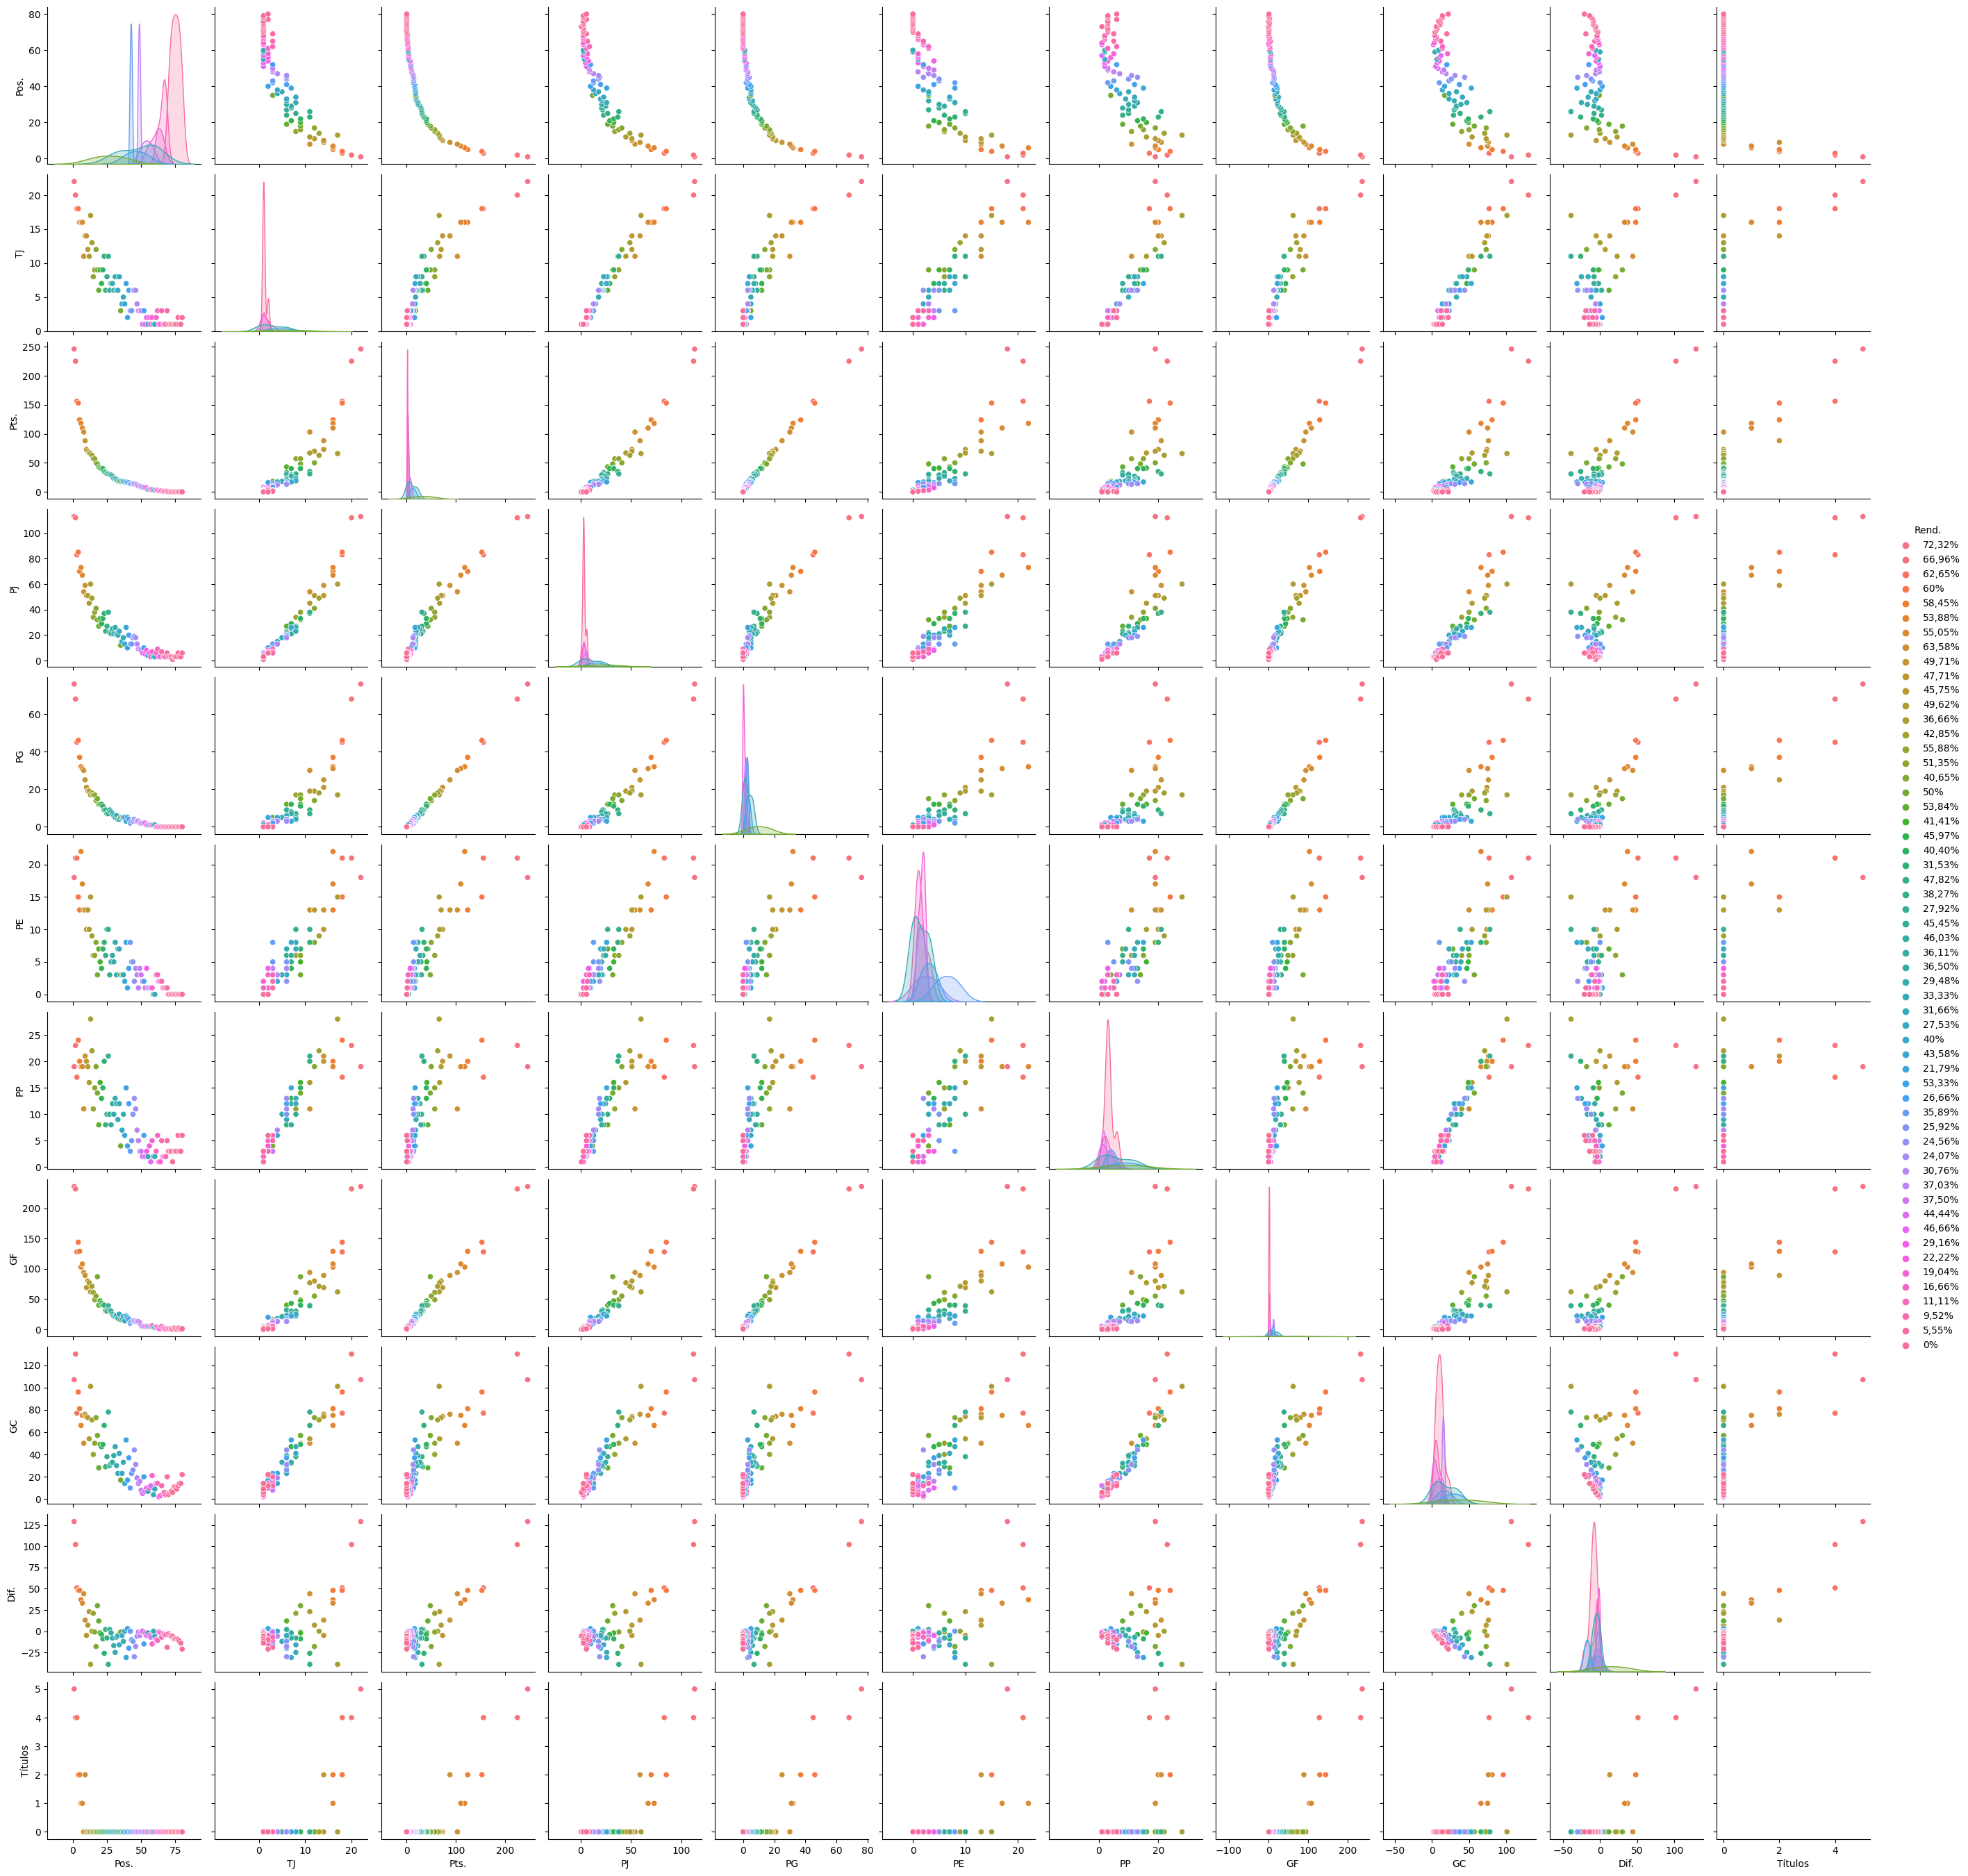

In [15]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Rend.")

> ## Interpretación de los gráficos ?
Realizar estudiante

In [13]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
sel_data = data[['Pts.', 'PJ','GF', 'Dif.']]
sel_data

,Pts.,PJ,GF,Dif.
0,246,113,236,129
1,225,112,232,102
2,156,83,128,51
3,153,85,144,48
4,124,70,129,48
...,...,...,...,...
75,0,3,0,-9
76,0,6,2,-10
77,0,3,2,-12
78,0,3,0,-14


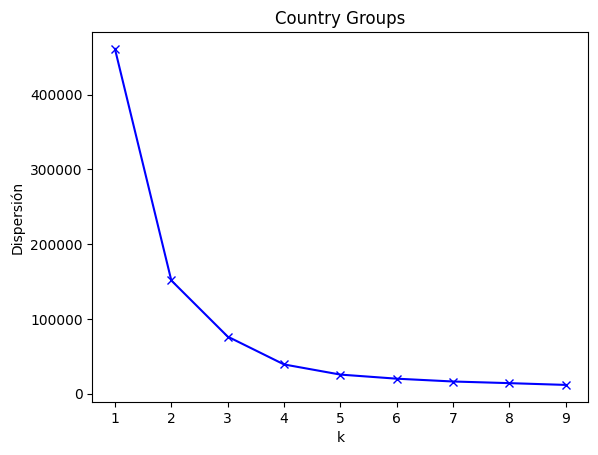

In [14]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Country Groups')

> ## Interpretación del gráfico ?
Realizar estudiante